links

https://medium.com/@raj.saha3382/forecasting-of-stock-market-using-arima-in-python-cd4fe76fc58a

# IMPORTS

In [2]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import os

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from google.colab import files

import tensorflow as tf
import tensorflow.python.keras as keras
from keras.models import Sequential
from keras import metrics
from keras.layers import Dense, LSTM, Dropout, Dense, Activation, GRU
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
#from keras.optimizers import gradient_descent_v2
from keras.utils import plot_model

#from tensorflow.python.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError

import nltk
from nltk.classify import NaiveBayesClassifier

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ENTRADA DE DADOS



1.   stock
2.   google news
3.   twitter



In [3]:
emp = {"PETR4": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/PETR4/norm_stock_PETR4.SA_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/PETR4/sentiment_gn_PETR4_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/PETR4/sentiment_tw_PETR4_2008-01-01_2022-09-20.csv'],

       "VALE3": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/VALE3/norm_stock_VALE3.SA_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/VALE3/sentiment_gn_VALE3_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/VALE3/sentiment_tw_VALE3_2008-01-01_2022-09-20.csv'],

       "ABEV3": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/ABEV3/norm_stock_ABEV3.SA_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/ABEV3/sentiment_gn_ABEV3_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/ABEV3/sentiment_tw_ABEV3_2008-01-01_2022-09-20.csv'],

       "BBDC4": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/BBDC4/norm_stock_BBDC4.SA_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/BBDC4/sentiment_gn_BBDC4_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/BBDC4/sentiment_tw_BBDC4_2008-01-01_2022-09-20.csv'],

       "ITUB4": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/ITUB4/norm_stock_ITUB4.SA_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/ITUB4/sentiment_gn_ITUB4_2008-01-01_2022-09-20.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/NEWTESTS/ITUB4/sentiment_tw_ITUB4_2008-01-01_2022-09-20.csv']}

## OLD DATASETS

In [ ]:
emp = {"mme_PETR4": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/norm_mme30_stock_PETR4.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_gn_petrobras_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_tw_petrobras_2011-01-01_2022-01-01.csv'],

       "mms_PETR4": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/norm_mms30_stock_PETR4.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_gn_petrobras_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_tw_petrobras_2011-01-01_2022-01-01.csv'],

       "norm_PETR4": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/norm_stock_PETR4.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_gn_petrobras_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_tw_petrobras_2011-01-01_2022-01-01.csv'],

       "raw_PETR4": [
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/stock_PETR4.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_gn_petrobras_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/DataTest/sentiment_tw_petrobras_2011-01-01_2022-01-01.csv']}

In [ ]:
emp = {"PETR4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/stock_PETR4.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/sentiment_gn_petrobras_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/sentiment_tw_petrobras_2011-01-01_2022-01-01.csv'],

       "VALE3": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/stock_VALE3.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/sentiment_gn_Vale S.A_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/sentiment_tw_valenobrasil_2011-01-01_2022-01-01.csv'],

       "ABEV3": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/stock_ABEV3.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/sentiment_gn_Ambev_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/sentiment_tw_Ambev_2011-01-01_2022-01-01.csv'],

       "BBDC4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/stock_BBDC4.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/sentiment_gn_Bradesco_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/sentiment_tw_Bradesco_2011-01-01_2022-01-01.csv'],

       "ITUB4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/stock_ITUB4.SA_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/sentiment_gn_itau_2011-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/sentiment_tw_itau_2011-01-01_2022-01-01.csv']}

In [ ]:
emp = {"PETR4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/stock_PETR4.SA_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/sentiment_gn_petrobras_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/sentiment_tw_petrobras_2021-01-01_2022-01-01.csv'],

       "VALE3": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/stock_VALE3.SA_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/sentiment_gn_vale_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/sentiment_tw_valenobrasil_2021-01-01_2022-01-01.csv'],

       "ABEV3": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/stock_ABEV3.SA_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/sentiment_gn_Ambev_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/sentiment_tw_Ambev_2021-01-01_2022-01-01.csv'],

       "BBDC4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/stock_BBDC4.SA_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/sentiment_gn_Bradesco_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/sentiment_tw_Bradesco_2021-01-01_2022-01-01.csv'],

       "ITUB4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/stock_ITUB4.SA_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/sentiment_gn_itau_2021-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/sentiment_tw_itau_2021-01-01_2022-01-01.csv']}

In [ ]:
emp = {"PETR4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/stock_PETR4.SA_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/sentiment_gn_petrobras_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/PETR4/sentiment_tw_petrobras_2019-01-01_2022-01-01.csv'],

       "VALE3": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/stock_VALE3.SA_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/sentiment_gn_vale_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/VALE3/sentiment_tw_valenobrasil_2019-01-01_2022-01-01.csv'],

       "ABEV3": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/stock_ABEV3.SA_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/sentiment_gn_Ambev_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ABEV3/sentiment_tw_Ambev_2019-01-01_2022-01-01.csv'],

       "BBDC4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/stock_BBDC4.SA_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/sentiment_gn_Bradesco_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/BBDC4/sentiment_tw_Bradesco_2019-01-01_2022-01-01.csv'],

       "ITUB4": ['/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/stock_ITUB4.SA_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/sentiment_gn_itau_2019-01-01_2022-01-01.csv',
                 '/content/drive/MyDrive/DEV/Python/Datasets/TCC/ITUB4/sentiment_tw_itau_2019-01-01_2022-01-01.csv']}

# FILTRANDO E UNINDO DATASETS

In [8]:
from IPython.lib.display import exists
current_stock = 'ITUB4'

stock_price = pd.read_csv(  emp[current_stock][0])
stock_gnews = pd.read_csv(  emp[current_stock][1])
stock_twitter = pd.read_csv(emp[current_stock][2])

stock_binary = pd.DataFrame(stock_price, columns=['target'])

stock_gnews = stock_gnews.filter(['date', 'compound', 'negative', 'neutral', 'positive'])
stock_twitter = stock_twitter.filter(['date', 'compound', 'negative', 'neutral', 'positive'])
stock_price = stock_price.filter(['date', 'close', 'open', 'high', 'low', 'volume'])

stock_gnews = stock_gnews.rename(columns={"compound": "compound_gn", "negative": "negative_gn", "neutral": "neutral_gn", "positive": "positive_gn"})
stock_twitter = stock_twitter.rename(columns={"compound": "compound_tw", "negative": "negative_tw", "neutral": "neutral_tw", "positive": "positive_tw"})

stock_twitter.head(10)

stock_data = stock_price.merge(stock_gnews, how='outer', on='date')
stock_data = stock_data.merge(stock_twitter, how='outer', on='date')

stock_data = stock_data[['date','close','compound_gn', 'negative_gn', 'neutral_gn', 'positive_gn', 'compound_tw', 'negative_tw', 'neutral_tw', 'positive_tw', 'open', 'high', 'low', 'volume']]
stock_data = stock_data.set_index('date')

# FIX NAN VALUES

def replace_nan(dataf):
  columns_idx = ['compound_gn', 'negative_gn', 'neutral_gn', 'positive_gn', 'compound_tw', 'negative_tw', 'neutral_tw', 'positive_tw']

  for item in columns_idx:
    if np.isnan(dataf[item][0]):
      if item == 'neutral_gn' or item == 'neutral_tw':
        dataf[item][0] = 1
      else:
        dataf[item][0] = 0

  for i in range(1, len(dataf)):
    for item in columns_idx:
      if np.isnan(dataf[item][i]):
        dataf[item][i] = dataf[item][i-1]

  #print(dataf)
  return dataf

def replace_missmode(dataf, miss_factor=2):
  columns_idx = ['compound_gn', 'negative_gn', 'neutral_gn', 'positive_gn', 'compound_tw', 'negative_tw', 'neutral_tw', 'positive_tw']

  for item in columns_idx:
    if np.isnan(dataf[item][0]):
      if item == 'neutral_gn' or item == 'neutral_tw':
        dataf[item][0] = 1
      else:
        dataf[item][0] = 0

  columns_idx = ['compound_gn', 'negative_gn', 'positive_gn', 'compound_tw', 'negative_tw', 'positive_tw']
  for i in range(1, len(dataf)):
    for item in columns_idx:
      if np.isnan(dataf[item][i]):
        dataf[item][i] = dataf[item][i-1]/miss_factor

    if np.isnan(dataf['neutral_gn'][i]):
      prev_gn = (dataf['negative_gn'][i-1]-dataf['negative_gn'][i])+(dataf['positive_gn'][i-1]-dataf['positive_gn'][i])
      dataf['neutral_gn'][i]  = dataf['neutral_gn'][i-1]+prev_gn
      #dataf['neutral_gw'][i] = float("{:.6f}".format(dataf['neutral_gw'][i]))
    if np.isnan(dataf['neutral_tw'][i]):
      prev_tw = (dataf['negative_tw'][i-1]-dataf['negative_tw'][i])+(dataf['positive_tw'][i-1]-dataf['positive_tw'][i])
      dataf['neutral_tw'][i] = dataf['neutral_tw'][i-1]+prev_tw

  #print(dataf)
  return dataf

stock_data = stock_data[stock_data['close'].notna()]

REPLACE_MODE = 2

# ZERO MODE
if REPLACE_MODE == 0:
  stock_data['neutral_gn'] = stock_data['neutral_gn'].replace(np.nan, 1, regex=True)
  stock_data['neutral_tw'] = stock_data['neutral_tw'].replace(np.nan, 1, regex=True)
  stock_data = stock_data.replace(np.nan, 0.0, regex=True)
# KEEP MODE
elif REPLACE_MODE == 1:
  stock_data = replace_nan(stock_data)
# MISS MODE
else:
  stock_data = replace_missmode(stock_data,miss_factor=2)


# COPY AND CHANGE TO IFR CALC
stockmmv_data = stock_data.copy(deep=True)
stock_data = stock_data.tail(len(stock_data.index)-30)

stock_data.to_csv('stock_data.csv')

# --------- SETUP -------------
plotdates = []
x = None
y = None
scaler_x = None
scaler_y = None
X_train = None
X_test = None
y_train = None
y_test = None
close_price = None
prepname = ''
metrics=[keras.metrics.RootMeanSquaredError(),'mse', 'mae', 'mape']
datacols = ['close_price', 'close_price_shifted']
cols = ['close_price']

savepath = '/content/drive/MyDrive/DEV/Python/Datasets/TCC/Tests/'+current_stock+'/default/'
avtestpath = '/content/drive/MyDrive/DEV/Python/Datasets/TCC/Tests/'+current_stock+'/default/avtests/'

if not os.path.exists(savepath):
  os.makedirs(savepath)

# ------------------------------

# stock_data.describe(include='all')
#stock_data.head(10)
stock_data.to_csv(current_stock + '_textuais_numericos.csv',sep=',')
stock_data.head(10)

,close,compound_gn,negative_gn,neutral_gn,positive_gn,compound_tw,negative_tw,neutral_tw,positive_tw,open,high,low,volume
date,,,,,,,,,,,,,
2008-02-18,0.204895,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.207330,0.194530,0.210532,0.023788
2008-02-19,0.193259,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.213126,0.197621,0.207263,0.073565
2008-02-20,0.203364,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.194895,0.192572,0.196927,0.036995
2008-02-21,0.200302,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.214179,0.199682,0.212641,0.057539
2008-02-22,0.210304,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.214179,0.199579,0.208528,0.062448
2008-02-25,0.213570,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.210702,0.202877,0.212958,0.087165
2008-02-26,0.225920,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.218395,0.215346,0.221922,0.082865
2008-02-27,0.232248,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.227352,0.228639,0.229516,0.089924
2008-02-28,0.230105,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.239365,0.226269,0.240906,0.059922


In [ ]:
ttttts = "%.6f" % 0.0000001
print(ttttts)

0.000000


In [ ]:
plt.figure(figsize=(20,10))
stock_data['close'].plot(color='red')
#stock_data['compound_tw'].plot()
normalized_tww=(stock_data['compound_tw']-stock_data['compound_tw'].min())/(stock_data['compound_tw'].max()-stock_data['compound_tw'].min())
#normalized_tww.rolling(window=90).mean().plot()
#normalized_ddf=(stock_data['compound_gn']-(-1))/(1-(-1))
normalized_ddf=(stock_data['compound_gn']-stock_data['compound_gn'].min())/(stock_data['compound_gn'].max()-stock_data['compound_gn'].min())
#normalized_ddf.rolling(window=90).mean().plot()
stock_data.rolling(window=90).mean()['compound_gn'].plot(color='blue')
stock_data.rolling(window=90).mean()['compound_tw'].plot(color='green')
plt.legend(['Stock', 'Google News', 'Twitter'])

# UTILS

In [ ]:
def write_file(lines, filename):
  with open(filename, 'w') as f:
      for line in lines:
          f.write(line)
          f.write('\n')


def calc_mms(serie, n):
  str_mms = 'MMS'+str(n)
  close_mms = serie.copy(deep=True)
  close_mms = close_mms.rename(str_mms)

  mms = serie[n]
  close_mms.iloc[n] = mms
  mult = (2/(n+1))
  for i in range(n, len(serie)):
    sum = 0
    count = 0
    for j in range(i-n, i):
      sum += serie.iloc[j]
      count += 1
    close_mms.iloc[i] = sum/n
  return close_mms

def calc_mme(serie, n):
  str_mme = 'MME'+str(n)
  close_mme = serie.copy(deep=True)
  close_mme = close_mme.rename(str_mme)

  mme = serie[n]
  close_mme.iloc[n] = mme
  mult = (2/(n+1))
  for i in range(n+1, len(serie)):
    mme = ((serie.iloc[i]-mme)*mult)+mme
    close_mme.iloc[i] = mme

  return close_mme

def calc_ifr(df):
  # Calculo do IFR
  dBaseCalIFR = pd.DataFrame(stockmmv_data, columns=['close'])
  dBaseCalIFR = dBaseCalIFR.rename(columns={'close': 'IFR'})

  difIFR = (df['close'].size + 15) - dBaseCalIFR.size;
  dBaseCalIFR = dBaseCalIFR.tail(difIFR)
  dIFR = dBaseCalIFR.copy(deep=True)

  somaG = 0
  somaP = 0
  contIFR = 0
  for j in range(1, 15):
      contIFR += 1
      varGPIFR = dBaseCalIFR['IFR'][j] - dBaseCalIFR['IFR'][j - 1]
      if (varGPIFR > 0):
          somaG += varGPIFR
      if (varGPIFR < 0):
          somaP += (varGPIFR * (-2)) / 2
  ganhoMedio = (somaG / 14)
  perdaMedia = (somaP / 14)
  FR = 1 + (ganhoMedio / perdaMedia)
  dIFR['IFR'][15] = 100 - (100 / FR)

  for i in range(16, len(dBaseCalIFR)):
    varGPIFR = dBaseCalIFR['IFR'][i] - dBaseCalIFR['IFR'][i - 1]
    auxG = 0
    auxP = 0
    if (varGPIFR > 0):
        auxG += varGPIFR
    if (varGPIFR < 0):
        auxP += (varGPIFR * (-2)) / 2

    ganhoMedio = ((ganhoMedio * 13) + auxG) / 14
    perdaMedia = ((perdaMedia * 13) + auxP) / 14
    FR = 1 + (ganhoMedio / perdaMedia)
    dIFR['IFR'][i] = 100 - (100 / FR)


  return dIFR

def reset_settings():
  global plotdates,x,y,scaler_x,scaler_y,prepname
  global X_train,X_test,y_train,y_test,datacols,cols,close_price

  plotdates = []
  x = None
  y = None
  scaler_x = None
  scaler_y = None
  X_train = None
  X_test = None
  y_train = None
  y_test = None
  close_price = None
  prepname = ''
  metrics=[keras.metrics.RootMeanSquaredError(),'mse', 'mae', 'mape']
  datacols = ['close_price', 'close_price_shifted']
  cols = ['close_price']

def get_UID():
  curdt = dt.datetime.now().astimezone(dt.timezone(dt.timedelta(hours=-3)))
  return curdt.strftime('%d%m%Y%H%M%S')

def get_savepath(extra='',subpath='none'):
  global avtestpath

  if subpath == 'none':
    savepath = '/content/drive/MyDrive/DEV/Python/Datasets/TCC/Tests/'+current_stock+'/'+get_UID()+'_'+extra+'/'
  else:
    savepath = '/content/drive/MyDrive/DEV/Python/Datasets/TCC/Tests/'+current_stock+'/'+subpath+'/'+get_UID()+'_'+extra+'/'

  if not os.path.exists(savepath):
    os.makedirs(savepath)

  # AVERAGE TESTS
  if not os.path.exists(avtestpath):
    os.makedirs(avtestpath)

  return savepath

# PLOTTING

Grafico mostrando o preço de fechamento.

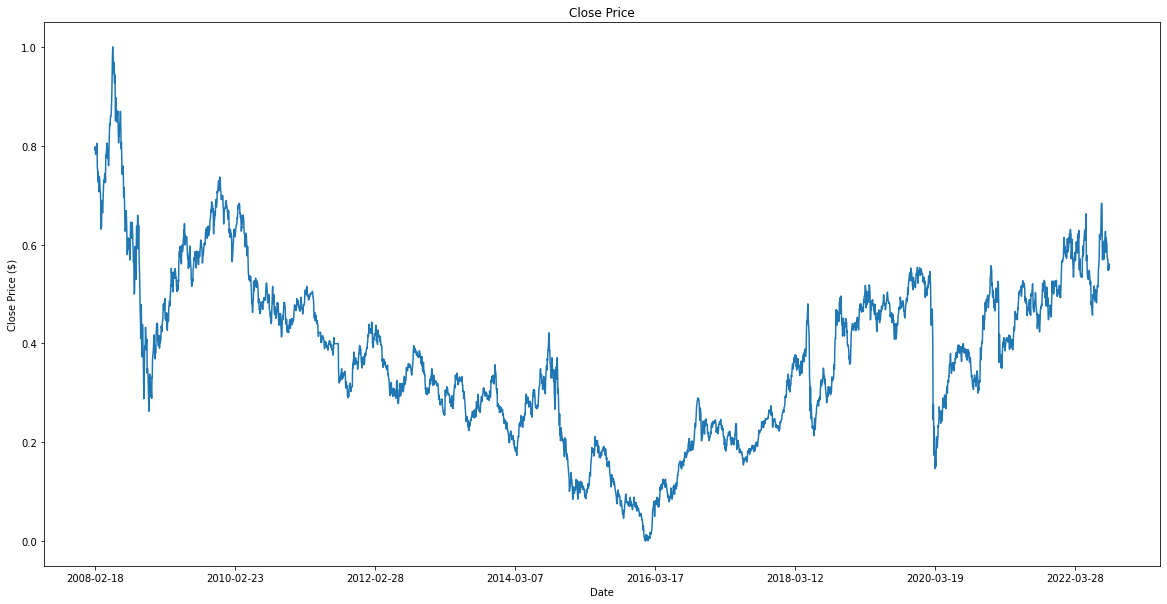

In [ ]:
# setting figure size
plt.figure(figsize=(20,10))

# plotting close price
stock_data['close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

plt.savefig('plot_stock_'+current_stock+'.png')

Grafico mostrando o preço de fechamento e a média móvel em um determinado número de dias do preço de fechamento.

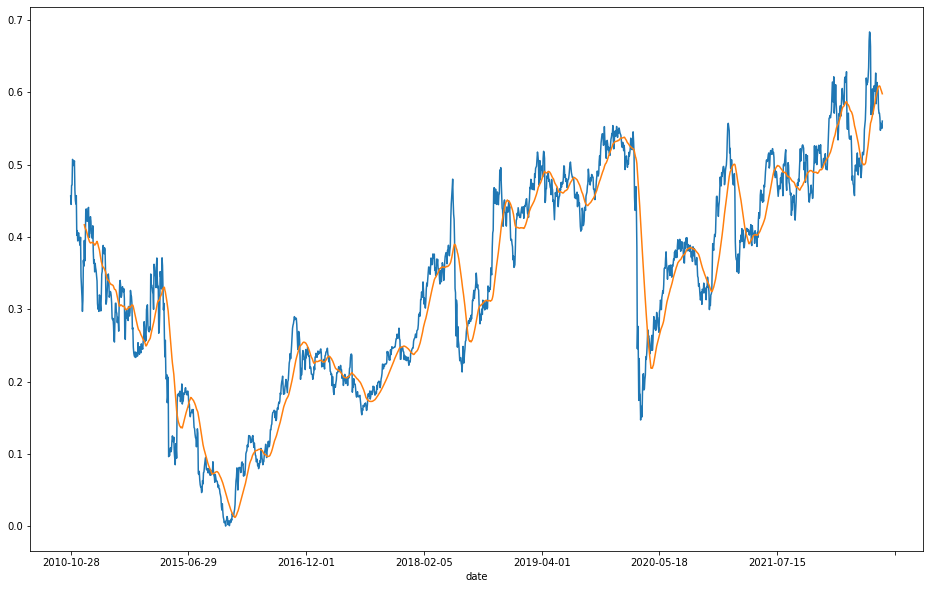

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

roll_days = 30

# plotting the close price and a n-day rolling mean of close price
stock_data['close'].plot()
stock_data.rolling(window=roll_days).mean()['close'].plot()

plt.savefig('plot_stock_'+str(roll_days)+'d_'+current_stock+'.png')

# PRED TEST TOP

In [ ]:
def create_sequence(df, column_name, lag=4):
  for i in range(lag):
    new_col_name = f'{column_name}_lag_{i+1}'
    df[new_col_name] = df[column_name].shift(periods= -(i+1))

def preparing_data_test(datamode = 'none',has_gn = True,has_tw = True,has_ifr=True,mm_days = 5):
  global plotdates,x,y,scaler_x,scaler_y,prepname,savepath
  global X_train,X_test,y_train,y_test,datacols,cols,close_price

  reset_settings()

  stock_copy = stock_data.copy(deep=True)
  scaler = MinMaxScaler()

  X = scaler.fit_transform(stock_copy[['volume', 'close']].values)
  stock_copy['volume_norm'] = X[:,0]
  stock_copy['close_norm'] = X[:,1]

  create_sequence(stock_copy, 'volume_norm')
  create_sequence(stock_copy, 'close_norm')

  stock_copy['y'] = stock_copy.close_norm.shift(periods=-5)

  stock_copy.dropna(inplace=True)

  X_volume = stock_copy[['volume_norm', 'volume_norm_lag_1', 'volume_norm_lag_2', 'volume_norm_lag_3','volume_norm_lag_4']].values
  X_fechamento = stock_copy[['close_norm', 'close_norm_lag_1', 'close_norm_lag_2', 'close_norm_lag_3', 'close_norm_lag_4']].values

  X = np.stack((X_volume, X_fechamento), axis=2)

  y = stock_copy.y.values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PREP MULT SHIFT TEST

In [ ]:
def preparing_data3(datamode = 'none',has_gn = True,has_tw = True,has_ifr=True,mm_days = 5,subpath='none'):
  global plotdates,x,y,scaler_x,scaler_y,prepname,savepath
  global X_train,X_test,y_train,y_test,datacols,cols,close_price

  reset_settings()

  datacols = ['close_price']

  # calculating data_to_use
  percentage_of_data = 1.0
  data_to_use = int(percentage_of_data*(len(stock_data)-1))

  # usando 80% de dados para treinamento
  train_end = int(data_to_use*0.8)
  total_data = len(stock_data)
  start = total_data - data_to_use

  # numero de passos a serem previstos
  steps_to_predict = 1

  # coletando dados de cada coluna
  close_price = stock_data.iloc[start:total_data,0] #close

  # google news
  compound_gn = stock_data.iloc[start:total_data,1] #compound
  compound_gn = (compound_gn-compound_gn.min())/(compound_gn.max()-compound_gn.min())
  negative_gn = stock_data.iloc[start:total_data,2] #neg
  neutral_gn = stock_data.iloc[start:total_data,3]  #neu
  positive_gn = stock_data.iloc[start:total_data,4] #pos

  # twitter
  compound_tw = stock_data.iloc[start:total_data,5] #compound
  compound_tw = (compound_tw-compound_tw.min())/(compound_tw.max()-compound_tw.min())
  negative_tw = stock_data.iloc[start:total_data,6] #neg
  neutral_tw = stock_data.iloc[start:total_data,7]  #neu
  positive_tw = stock_data.iloc[start:total_data,8] #pos

  # stock prices
  open_price = stock_data.iloc[start:total_data,9]  #open
  high = stock_data.iloc[start:total_data,10]       #high
  low = stock_data.iloc[start:total_data,11]        #low
  volume = stock_data.iloc[start:total_data,12]     #volume

  # deslocando valores de close (fechamento) para o proximo dia
  close_price_shifted = close_price.shift(-1)

  # deslocando polarizacoes de sentimentos (compound) para o proximo dia
  compound_gn_shifted = compound_gn.shift(-1)
  compound_tw_shifted = compound_tw.shift(-1)

  data = pd.DataFrame()

  # definindo listas iniciais
  datalist = [close_price]
  #datalist = [close_price, close_price_shifted]

  # MULTIPLE SHIFTS TEST
  column_name = 'close_price_shifted'
  for i in range(4):
    new_col_name = f'{column_name}_lag_{i+1}'
    datalist.append(close_price.shift(periods= -(i+1)))
    datacols.append(new_col_name)
    cols.append(new_col_name)

  # verificar se vai ser utilizado dados do google news
  if has_gn:
    datalist.append(compound_gn)
    datalist.append(compound_gn_shifted)
    datacols.append('compound_gn')
    datacols.append('compound_gn_shifted')
    cols.append('compound_gn')
    cols.append('compound_gn_shifted')
    prepname+='gn'

  # verificar se vai ser utilizado dados do twitter
  if has_tw:
    datalist.append(compound_tw)
    datalist.append(compound_tw_shifted)
    datacols.append('compound_tw')
    datacols.append('compound_tw_shifted')
    cols.append('compound_tw')
    cols.append('compound_tw_shifted')
    prepname+='tw'

  if has_ifr:
    ifr = calc_ifr(stock_data)
    datalist.append(ifr)
    datacols.append('ifr')
    cols.append('ifr')
    prepname+='ifr'

  if datamode == 'mms':
    close_mms30 = calc_mms(close_price, 30)
    close_mms5 = calc_mms(close_price, 5)
    datalist.append(close_mms30)
    datalist.append(close_mms5)
    datacols.append('mms30')
    datacols.append('mms5')
    cols.append('mms30')
    cols.append('mms5')
    prepname+='mms'

  elif datamode == 'mme':
    close_mme30 = calc_mme(close_price, 30)
    close_mme5 = calc_mme(close_price, 5)
    datalist.append(close_mme30)
    datalist.append(close_mme5)
    datacols.append('mme30')
    datacols.append('mme5')
    cols.append('mme30')
    cols.append('mme5')
    prepname+='mme'


  datalist.append(volume)
  datalist.append(open_price)
  datalist.append(high)
  datalist.append(low)
  datacols.append('volume')
  cols.append('volume')
  datacols.append('open_price')
  cols.append('open_price')
  datacols.append('high')
  cols.append('high')
  datacols.append('low')
  cols.append('low')

  data = pd.concat(datalist, axis=1)
  data.columns = datacols

  print(cols)
  print(datacols)

  savepath = get_savepath(prepname,subpath=subpath)

  data['y'] = close_price.shift(-5)

  # dropping nulls
  data = data.dropna()

  # setting the target variable as the shifted close_price
  y = data['y']

  # setting the features dataset for prediction
  x = data[cols]
  print('top ',len(x))

  # scaling the feature dataset
  scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
  x = np.array(x).reshape((len(x) ,len(cols)))
  x = scaler_x.fit_transform(x)

  # scaling the target variable
  scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
  y = np.array (y).reshape ((len( y), 1))
  y = scaler_y.fit_transform (y)

  # preparing training and test dataset
  X_train = x[0 : train_end,]
  X_test = x[train_end+1 : len(x),]
  y_train = y[0 : train_end]
  y_test = y[train_end+1 : len(y)]

  # reshaping the feature dataset for feeding into the model
  X_train = X_train.reshape (X_train.shape + (1,))
  X_test = X_test.reshape(X_test.shape + (1,))

  plotdates = stock_data.iloc[train_end+1 : len(y)].index.values

  return [data,x,y]

In [ ]:
rdf = preparing_data3(datamode='mms')
print(len(X_test))
print(len(y_test))

# PREPARING DATA - AJUSTAR METODO UNICO

In [ ]:
def preparing_data(datamode = 'none',has_gn = True,has_tw = True,has_ifr=True,mm_days = 5,subpath='none',modelname=''):
  global plotdates,x,y,scaler_x,scaler_y,prepname,savepath
  global X_train,X_test,y_train,y_test,datacols,cols,close_price

  reset_settings()

  # calculating data_to_use
  percentage_of_data = 1.0
  data_to_use = int(percentage_of_data*(len(stock_data)-1))

  # usando 80% de dados para treinamento
  train_end = int(data_to_use*0.8)
  total_data = len(stock_data)
  start = total_data - data_to_use

  # numero de passos a serem previstos
  steps_to_predict = 1

  # coletando dados de cada coluna
  close_price = stock_data.iloc[start:total_data,0] #close

  # google news
  compound_gn = stock_data.iloc[start:total_data,1] #compound
  compound_gn = (compound_gn-compound_gn.min())/(compound_gn.max()-compound_gn.min())
  negative_gn = stock_data.iloc[start:total_data,2] #neg
  neutral_gn = stock_data.iloc[start:total_data,3]  #neu
  positive_gn = stock_data.iloc[start:total_data,4] #pos

  # twitter
  compound_tw = stock_data.iloc[start:total_data,5] #compound
  compound_tw = (compound_tw-compound_tw.min())/(compound_tw.max()-compound_tw.min())
  negative_tw = stock_data.iloc[start:total_data,6] #neg
  neutral_tw = stock_data.iloc[start:total_data,7]  #neu
  positive_tw = stock_data.iloc[start:total_data,8] #pos

  # stock prices
  open_price = stock_data.iloc[start:total_data,9]  #open
  high = stock_data.iloc[start:total_data,10]       #high
  low = stock_data.iloc[start:total_data,11]        #low
  volume = stock_data.iloc[start:total_data,12]     #volume

  # deslocando valores de close (fechamento) para o proximo dia
  close_price_shifted = close_price.shift(-1)

  # deslocando polarizacoes de sentimentos (compound) para o proximo dia
  compound_gn_shifted = compound_gn.shift(-1)
  compound_tw_shifted = compound_tw.shift(-1)

  data = pd.DataFrame()

  # definindo listas iniciais
  datalist = [close_price, close_price_shifted]

  # verificar se vai ser utilizado dados do google news
  if has_gn:
    datalist.append(compound_gn)
    datalist.append(compound_gn_shifted)
    datacols.append('compound_gn')
    datacols.append('compound_gn_shifted')
    cols.append('compound_gn')
    cols.append('compound_gn_shifted')
    prepname+='gn'

  # verificar se vai ser utilizado dados do twitter
  if has_tw:
    datalist.append(compound_tw)
    datalist.append(compound_tw_shifted)
    datacols.append('compound_tw')
    datacols.append('compound_tw_shifted')
    cols.append('compound_tw')
    cols.append('compound_tw_shifted')
    prepname+='tw'

  if has_ifr:
    ifr = calc_ifr(stock_data)
    datalist.append(ifr)
    datacols.append('ifr')
    cols.append('ifr')
    prepname+='ifr'

  if datamode == 'mms':
    close_mms30 = calc_mms(close_price, 30)
    close_mms5 = calc_mms(close_price, 5)
    datalist.append(close_mms30)
    datalist.append(close_mms5)
    datacols.append('mms30')
    datacols.append('mms5')
    cols.append('mms30')
    cols.append('mms5')
    prepname+='mms'

  elif datamode == 'mme':
    close_mme30 = calc_mme(close_price, 30)
    close_mme5 = calc_mme(close_price, 5)
    datalist.append(close_mme30)
    datalist.append(close_mme5)
    datacols.append('mme30')
    datacols.append('mme5')
    cols.append('mme30')
    cols.append('mme5')
    prepname+='mme'


  datalist.append(volume)
  datalist.append(open_price)
  datalist.append(high)
  datalist.append(low)
  datacols.append('volume')
  cols.append('volume')
  datacols.append('open_price')
  cols.append('open_price')
  datacols.append('high')
  cols.append('high')
  datacols.append('low')
  cols.append('low')

  data = pd.concat(datalist, axis=1)
  data.columns = datacols

  print(cols)
  print(datacols)

  savepath = get_savepath(prepname+'_'+modelname, subpath=subpath)

  # dropping nulls
  data = data.dropna()

  # setting the target variable as the shifted close_price
  y = data['close_price_shifted']

  # setting the features dataset for prediction
  x = data[cols]

  # scaling the feature dataset
  scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
  x = np.array(x).reshape((len(x) ,len(cols)))
  x = scaler_x.fit_transform(x)

  # scaling the target variable
  scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
  y = np.array (y).reshape ((len( y), 1))
  y = scaler_y.fit_transform (y)

  # preparing training and test dataset
  X_train = x[0 : train_end,]
  X_test = x[train_end+1 : len(x),]
  y_train = y[0 : train_end]
  y_test = y[train_end+1 : len(y)]

  # reshaping the feature dataset for feeding into the model
  X_train = X_train.reshape (X_train.shape + (1,))
  X_test = X_test.reshape(X_test.shape + (1,))

  plotdates = stock_data.iloc[train_end+1 : len(y)].index.values

  return data

# OLD_PRED 1

In [ ]:
datamode = 'none'
has_gn = True
has_tw = True
mm_days = 5

# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# usando 80% de dados para treinamento
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# numero de passos a serem previstos
steps_to_predict = 1

# coletando dados de cada coluna
close_price = stock_data.iloc[start:total_data,0] #close

# google news
compound_gn = stock_data.iloc[start:total_data,1] #compound
negative_gn = stock_data.iloc[start:total_data,2] #neg
neutral_gn = stock_data.iloc[start:total_data,3]  #neu
positive_gn = stock_data.iloc[start:total_data,4] #pos

# twitter
compound_tw = stock_data.iloc[start:total_data,5] #compound
negative_tw = stock_data.iloc[start:total_data,6] #neg
neutral_tw = stock_data.iloc[start:total_data,7]  #neu
positive_tw = stock_data.iloc[start:total_data,8] #pos

# stock prices
open_price = stock_data.iloc[start:total_data,9]  #open
high = stock_data.iloc[start:total_data,10]       #high
low = stock_data.iloc[start:total_data,11]        #low
volume = stock_data.iloc[start:total_data,12]     #volume

# deslocando valores de close (fechamento) para o proximo dia
close_price_shifted = close_price.shift(-1)

# deslocando polarizacoes de sentimentos (compound) para o proximo dia
compound_gn_shifted = compound_gn.shift(-1)
compound_tw_shifted = compound_tw.shift(-1)

data = pd.DataFrame()

# definindo listas iniciais
datalist = [close_price, close_price_shifted]
datacols = ['close_price', 'close_price_shifted']
cols = ['close_price']

# verificar se vai ser utilizado dados do google news
if has_gn:
  datalist.append(compound_gn)
  datalist.append(compound_gn_shifted)
  datacols.append('compound_gn')
  datacols.append('compound_gn_shifted')
  cols.append('compound_gn')
  cols.append('compound_gn_shifted')

# verificar se vai ser utilizado dados do twitter
if has_tw:
  datalist.append(compound_tw)
  datalist.append(compound_tw_shifted)
  datacols.append('compound_tw')
  datacols.append('compound_tw_shifted')
  cols.append('compound_tw')
  cols.append('compound_tw_shifted')

if datamode == 'mms':
  close_mms = calc_mms(close_price, mm_days)
  datalist.append(close_mms)
  datacols.append('mms')
  cols.append('mms')

elif datamode == 'mme':
  close_mme = calc_mme(close_price, mm_days)
  datalist.append(close_mme)
  datacols.append('mme')
  cols.append('mme')


datalist.append(volume)
datalist.append(open_price)
datalist.append(high)
datalist.append(low)
datacols.append('volume')
cols.append('volume')
datacols.append('open_price')
cols.append('open_price')
datacols.append('high')
cols.append('high')
datacols.append('low')
cols.append('low')

data = pd.concat(datalist, axis=1)
data.columns = datacols

print(cols)
print(datacols)

# dropping nulls
data = data.dropna()

# setting the target variable as the shifted close_price
y = data['close_price_shifted']

# setting the features dataset for prediction
x = data[cols]

# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]
y_train = y[0 : train_end]
y_test = y[train_end+1 : len(y)]

# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

plotdates = stock_data.iloc[train_end+1 : len(y)].index.values

['close_price', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted', 'volume', 'open_price', 'high', 'low']
['close_price', 'close_price_shifted', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted', 'volume', 'open_price', 'high', 'low']


# OLD_PRED 2

In [ ]:
#datamode = mms
#datamode = mme
#datamode = none
datamode = 'none'
mm_days = 5

# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
# print("Number of records in Training Data:", train_end)
# print("Number of records in Test Data:", total_data - train_end)

# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stock_data.iloc[start:total_data,0] #close

compound_gn = stock_data.iloc[start:total_data,1] #compound
negative_gn = stock_data.iloc[start:total_data,2] #neg
neutral_gn = stock_data.iloc[start:total_data,3] #neu
positive_gn = stock_data.iloc[start:total_data,4] #pos

compound_tw = stock_data.iloc[start:total_data,5] #compound
negative_tw = stock_data.iloc[start:total_data,6] #neg
neutral_tw = stock_data.iloc[start:total_data,7] #neu
positive_tw = stock_data.iloc[start:total_data,8] #pos

open_price = stock_data.iloc[start:total_data,9] #open
high = stock_data.iloc[start:total_data,10] #high
low = stock_data.iloc[start:total_data,11] #low
volume = stock_data.iloc[start:total_data,12] #volume

# test with MME
#close_mme30 = calc_mme(close_price, 5)

# shifting next day close
close_price_shifted = close_price.shift(-1)

# shifting next day compound
compound_gn_shifted = compound_gn.shift(-1)
compound_tw_shifted = compound_tw.shift(-1)

data = pd.DataFrame()
cols = []

# concatenating the captured training data into a dataframe
# setting column names of the revised stock data
if datamode == 'mms':
  close_mms = calc_mms(close_price, mm_days)
  data = pd.concat([close_price, close_price_shifted, close_mms, compound_gn, compound_gn_shifted, compound_tw, compound_tw_shifted, volume, open_price, high, low], axis=1)
  data.columns = ['close_price', 'close_price_shifted','mms', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted','volume', 'open_price', 'high', 'low']
  cols = ['close_price', 'mms', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted', 'volume', 'open_price', 'high', 'low']
elif datamode == 'mme':
  close_mme = calc_mme(close_price, mm_days)
  data = pd.concat([close_price, close_price_shifted, close_mme, compound_gn, compound_gn_shifted, compound_tw, compound_tw_shifted, volume, open_price, high, low], axis=1)
  data.columns = ['close_price', 'close_price_shifted','mme', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted','volume', 'open_price', 'high', 'low']
  cols = ['close_price', 'mme', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted', 'volume', 'open_price', 'high', 'low']
else:
  data = pd.concat([close_price, close_price_shifted, compound_gn, compound_gn_shifted, compound_tw, compound_tw_shifted, volume, open_price, high, low], axis=1)
  data.columns = ['close_price', 'close_price_shifted', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted','volume', 'open_price', 'high', 'low']
  cols = ['close_price', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted', 'volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()

# setting the target variable as the shifted close_price
y = data['close_price_shifted']

# setting the features dataset for prediction
x = data[cols]

# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]
y_train = y[0 : train_end]
y_test = y[train_end+1 : len(y)]

# printing the shape of the training and the test datasets
# print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
# print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
# print('Shape of Training set X:', X_train.shape)
# print('Shape of Test set X:', X_test.shape)

plotdates = stock_data.iloc[train_end+1 : len(y)].index.values

In [ ]:
# print(start)
# plotdates = stock_data.iloc[train_end+1 : len(y)].index.values
# dates

In [ ]:
close_price.head()

# PLOTTING STATISTICS

['close_price', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted', 'ifr', 'volume', 'open_price', 'high', 'low']
['close_price', 'close_price_shifted', 'compound_gn', 'compound_gn_shifted', 'compound_tw', 'compound_tw_shifted', 'ifr', 'volume', 'open_price', 'high', 'low']


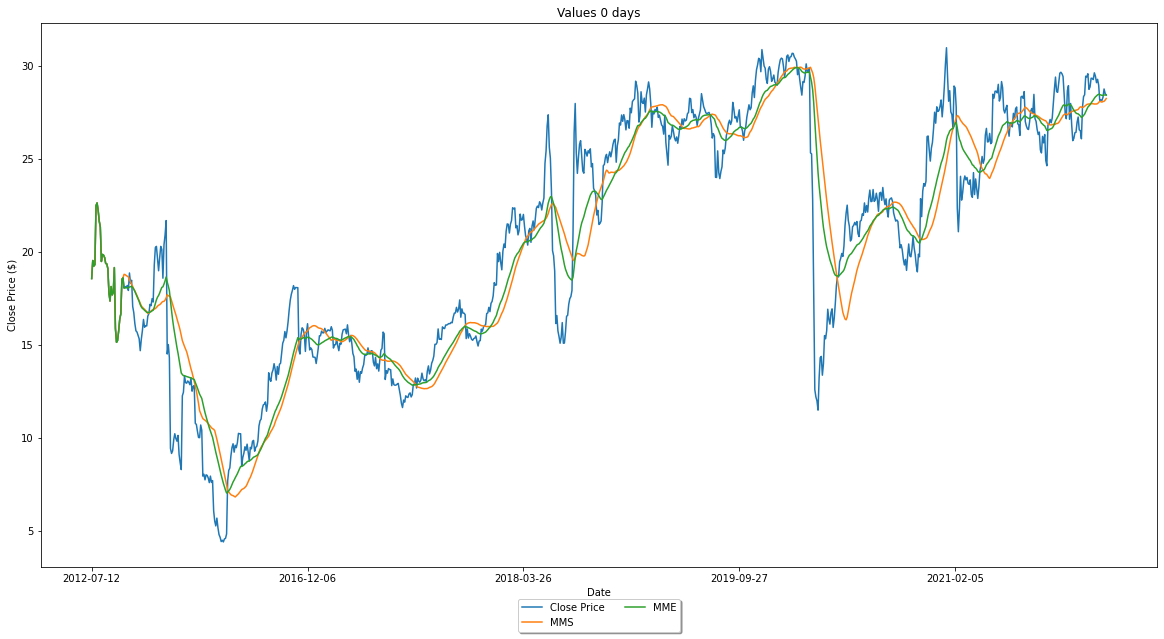

In [ ]:
def plt_close_statistic(n_days, fulldays=False):
  close_mms = calc_mms(close_price, n_days)
  close_mme = calc_mme(close_price, n_days)

  plt.figure(figsize=(20,10))

  if fulldays:
    n_days = 0

  close_price.iloc[n_days:].plot(label="Close Price")
  close_mms.iloc[n_days:].plot(label="MMS")
  close_mme.iloc[n_days:].plot(label="MME")

  plt.title(f"Values {n_days} days")
  plt.xlabel('Date')
  plt.ylabel('Close Price ($)')

  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

  ffname = 'plot_stock_'+current_stock+'_MME_MMS'+'.png'
  plt.savefig(savepath+ffname)

preparing_data()
plt_close_statistic(30, fulldays=True)

# CLASS MODEL TEST

In [ ]:
class ModelEvaluation():
  def __init__(self, name, x_train, y_train, epochs=10, batch_size=32,
               verbose=-1, validation_split=-1):
    np.random.seed(2022)
    self.name = name
    self.model = Sequential()
    self.history = None
    self.x_train = x_train
    self.y_train = y_train
    self.epochs = epochs
    self.batch_size = batch_size
    self.verbose = verbose
    self.validation_split = validation_split

  def addLSTM(self, units, activation):
    self.model.add(LSTM(units,activation=activation))

  def addLSTM(self, units, return_sequences):
    self.model.add(LSTM(units,return_sequences=return_sequences))

  def addLSTM(self, units, activation, return_sequences):
    self.model.add(LSTM(units,return_sequences=return_sequences,
                        activation=activation))

  def addLSTM(self, units, activation, return_sequences,input_shape):
    self.model.add(LSTM(units,return_sequences=return_sequences,
                        activation=activation,input_shape=input_shape))

  def addLSTM(self, units, activation, return_sequences,input_shape, dropout):
    self.model.add(LSTM(units,return_sequences=return_sequences,
                        activation=activation,input_shape=input_shape,
                        dropout=dropout))

  def addDropout(self, value):
    self.model.add(Dropout(value))
  def addDense(self, units):
    self.model.add(Dense(units))

  def compile(self, loss, optimizer, metrics):
    self.model.compile(loss=loss , optimizer=optimizer, metrics=metrics)

  def fit(self):
    if self.verbose >= 0:
      if self.validation_split >= 0:
        self.history = self.model.fit(self.x_train, self.y_train,
                                      validation_split=self.validation_split,
                                      epochs=self.epochs,
                                      batch_size=self.batch_size,
                                      verbose=self.verbose)
    else:
      self.history = self.model.fit(self.x_train, self.y_train,
                                    epochs=self.epochs,
                                    batch_size=self.batch_size)

In [ ]:
model1 = ModelEvaluation('model1', X_train, y_train, epochs=20, batch_size=32)
model1.addLSTM(50, )

# NEW MODELING

In [ ]:
class MModel():
  def __init__(self,epochs=25,mtype=1):
    self.current_model = 'none'
    self.epochs = epochs
    self.model = Sequential()
    self.mtype = mtype

  def modelo2(self):
    self.current_model = 'modelo_2'
    self.model = Sequential()
    self.model.add(
        LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='tanh', recurrent_activation='sigmoid'))
    self.model.add(LSTM(units=300, return_sequences=True, activation='tanh',
                            dropout=0.03, recurrent_activation='sigmoid'))
    self.model.add(LSTM(units=400, activation='tanh', dropout=0.03,
                            recurrent_activation='sigmoid'))
    self.model.add(Dense(1))

    self.model.compile(loss='mse', optimizer='adam', metrics=metrics)

  def modelo3(self):
    self.current_model = 'modelo_3'
    np.random.seed(2022)
    self.model = Sequential()
    self.model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
    self.model.add(Dropout(0.1))
    self.model.add(LSTM(100,return_sequences=True,activation='tanh'))
    self.model.add(Dropout(0.1))
    self.model.add(LSTM(100,activation='tanh'))
    self.model.add(Dropout(0.1))
    self.model.add(Dense(1))
    self.model.compile(loss='mse' , optimizer='adam', metrics=metrics)

  def modelo6(self):
    self.current_model = 'modelo_6'
    self.model = Sequential()
    self.model.add(LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])))
    self.model.add(Dense(1))
    self.model.compile(loss='mean_squared_error', optimizer='adam', metrics=metrics)

  # GRU
  def modelo7(self):
    self.current_model = 'modelo_7'
    self.model = Sequential()
    self.model.add(GRU(2, input_shape=(X_train.shape[1], 1)))
    self.model.add(Dense(1, activation="sigmoid"))
    self.model.compile(optimizer="adam", loss="mean_squared_error", metrics=['acc'])

  # DNN
  def modelo8(self):
    self.current_model = 'modelo_8'
    self.model = Sequential()
    self.model.add(Dense(units=32, input_shape=(X_train.shape[1],), activation='relu'))
    self.model.add(Dense(8, activation='relu'))
    self.model.add(Dense(1))
    self.model.compile(loss='mean_squared_error',  optimizer='adam',metrics = metrics)
    #self.model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae', 'mape'])

    #self.model.add(Dense(2, activation="relu", input_shape=(X_train.shape[1],)))
    #self.model.add(Dense(1, activation="sigmoid"))
    #self.model.compile(optimizer="adam", loss="mean_squared_error", metrics=['acc'])


  def run(self):
    if self.mtype == 1:
      pass
    elif self.mtype == 2:
      self.modelo2()
      history = self.model.fit(X_train, y_train, epochs=self.epochs, validation_split=0.1, batch_size=32)
    elif self.mtype == 3:
      self.modelo3()
      history = self.model.fit(X_train, y_train, validation_split=0.2, epochs=self.epochs, batch_size=8, verbose=1)
    elif self.mtype == 6:
      self.modelo6()
      history = self.model.fit(X_train, y_train, epochs=self.epochs, validation_split=0.1, batch_size=64)
    elif self.mtype == 7:
      self.modelo7()
      history = self.model.fit(X_train[:, :, np.newaxis], y_train, epochs=self.epochs)
    elif self.mtype == 8:
      self.modelo8()
      #history = self.model.fit(X_train, y_train, epochs=self.epochs)
      #history = self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=30, verbose=1, validation_split=0.1,shuffle=False)
      history = self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=30, verbose=1, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)
      #
    return [self.current_model,self.model,history]

def model2(epochs=25):
  current_model = 'modelo_2'
  model = Sequential()
  model.add(
      LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
            activation='tanh', recurrent_activation='sigmoid'))
  model.add(LSTM(units=300, return_sequences=True, activation='tanh',
                          dropout=0.03, recurrent_activation='sigmoid'))
  model.add(LSTM(units=400, activation='tanh', dropout=0.03,
                          recurrent_activation='sigmoid'))
  model.add(Dense(1))

  model.compile(loss='mse', optimizer='adam', metrics=metrics)
  history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.1, batch_size=32)
  return [current_model,model,history]

def model6(epochs=100):
  current_model = 'modelo_6'
  model = Sequential()
  model.add(LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=metrics)
  history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.1, batch_size=64)
  return [current_model,model,history]

# OLD MODELS

MODELO 1

In [ ]:
current_model = 'modelo_1'

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error', metrics=metrics)
history = model.fit(X_train,y_train,epochs=20,batch_size=32)

MODELO 2 - RENI

In [ ]:
# RENI MODEL
current_model = 'modelo_2'

model = Sequential()
model.add(
    LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
          activation='tanh', recurrent_activation='sigmoid'))
model.add(LSTM(units=300, return_sequences=True, activation='tanh',
                        dropout=0.03, recurrent_activation='sigmoid'))
model.add(LSTM(units=400, activation='tanh', dropout=0.03,
                        recurrent_activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=metrics)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, batch_size=32)

print(history.history.keys())

MODELO 3 - SABJ

In [ ]:
current_model = 'modelo_3'
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2022)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))
# printing the model summary
# model.summary()

model.compile(loss='mse' , optimizer='adam', metrics=metrics)

# fitting the model using the training dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=8, verbose=1)

MODELO 4

In [ ]:
current_model = 'modelo_4'

# https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571
# RELU 50 Test

model = Sequential()
model.add(
    LSTM(units=50, return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2]),
         activation='relu'))

model.add(LSTM(units=50, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
current_model = 'modelo_4_1'

# https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571
# RELU 50 Test

model = Sequential()
model.add(
    LSTM(units=50, return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2]),
         activation='relu'))

model.add(LSTM(units=100, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=300, batch_size=32)

In [ ]:
current_model = 'modelo_4_2'

# https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571
# RELU 50 Test

model = Sequential()
model.add(
    LSTM(units=50, return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2]),
         activation='relu'))

model.add(LSTM(units=50, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=300, batch_size=32)

MODELO 5

In [ ]:
current_model = 'modelo_5'

# RENI EDITED

model = Sequential()
model.add(
    LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
          activation='tanh', recurrent_activation='sigmoid'))

model.add(LSTM(units=300, return_sequences=True, activation='tanh',
                        dropout=0.02, recurrent_activation='sigmoid'))

model.add(LSTM(units=400, activation='tanh', dropout=0.02,
                        recurrent_activation='sigmoid'))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(lr=0.004)

model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

In [ ]:
current_model = 'modelo_5_1'

# RENI EDITED

model = Sequential()
model.add(
    LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
          activation='tanh', recurrent_activation='sigmoid'))

model.add(LSTM(units=300, return_sequences=True, activation='tanh',
                        dropout=0.02, recurrent_activation='sigmoid'))

model.add(LSTM(units=400, return_sequences=True, activation='tanh',
                        dropout=0.02, recurrent_activation='sigmoid'))

model.add(LSTM(units=500, activation='tanh', dropout=0.02,
                        recurrent_activation='sigmoid'))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(lr=0.004)

model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

In [ ]:
current_model = 'modelo_5_2'

# RENI EDITED

model = Sequential()
model.add(
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
          activation='tanh', recurrent_activation='sigmoid'))

model.add(LSTM(units=100, return_sequences=True, activation='tanh',
                        dropout=0.03, recurrent_activation='sigmoid'))

model.add(LSTM(units=150, activation='tanh', dropout=0.03,
                        recurrent_activation='sigmoid'))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(lr=0.002)

model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, batch_size=32)

MODELO 6

In [ ]:
preparing_data_test()

model = Sequential()
model.add(LSTM(16, input_shape=(None,2,)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=metrics)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=64)



In [ ]:
predictions = model.predict(X_test)

preal = [row for row in y_test]
pprevisto = [row[0] for row in predictions]
taccuracy = calcularTaxaDeAcertoDirecional(preal, pprevisto, nDias=1)

Taxa de acerto 1 dia(s): 0.34408602150537637


# FINAL PLOTTING AND CALCULAR ACURANCY

In [ ]:
import csv

def final_plot(model_name,predictions):
  # plotting
  plt.figure(figsize=(16,10))

  xdate = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in plotdates]
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))

  # plt.plot([row[0] for row in y_train], label="Training Close Price")
  plt.plot(xdate, [row[0] for row in predictions], label="Predicted Close Price")
  plt.plot(xdate, [row[0] for row in y_test], label="Testing Close Price")
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

  ffname = 'plot_predict_'+prepname+'_'+current_stock+'_'+model_name+'.png'

  plt.savefig(savepath+ffname)
  plt.show()

def calcularTaxaDeAcertoDirecional(precoreal, precoprevisto, nomeArquivo='none', nDias=1):
    direcao = []
    for i in range(1, len(precoprevisto)-nDias):
        if (precoreal[i+nDias] > precoreal[i+nDias - 1]):
            if (precoprevisto[i] > precoprevisto[i - 1]):
                direcao.append(1)
            else:
                direcao.append(0)
        if (precoreal[i+nDias] < precoreal[i+nDias - 1]):
            if (precoprevisto[i] < precoprevisto[i - 1]):
                direcao.append(1)
            else:
                direcao.append(0)

    soma = 0
    cont = 0
    for i in range(0, len(direcao)):
        soma += direcao[i]
        cont += 1

    dfftemp = pd.DataFrame()
    dfftemp['real'] = precoreal[:len(direcao)]
    dfftemp['previsto'] = precoprevisto[:len(direcao)]
    dfftemp['directions'] = direcao
    dfftemp.to_csv('test_new.csv', ';')

    percentual = soma / cont

    if nomeArquivo != 'none':
      p = []
      p.append(percentual)
      p = np.array(p)
      dp = pd.DataFrame(p)
      dp.to_csv(nomeArquivo + '_percentual.csv', ';')

    print("Taxa de acerto "+str(nDias)+" dia(s): "+str(percentual))

    return percentual

def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

def plot_metrics(datahist, filename):
  plt.rcParams['figure.figsize'] = (10.0, 10.0)

  plt.subplot(221)
  plt.plot(datahist.history['loss'])
  plt.plot(datahist.history['val_loss'])
  plt.title('MSE')
  plt.ylabel('MSE')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])

  if 'root_mean_squared_error' in datahist.history:
    plt.subplot(222)
    plt.plot(datahist.history['root_mean_squared_error'])
    plt.plot(datahist.history['val_root_mean_squared_error'])
    plt.title('RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])

  plt.subplot(223)
  plt.plot(datahist.history['mae'])
  plt.plot(datahist.history['val_mae'])
  plt.title('MAE')
  plt.ylabel('MAE')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])

  plt.subplot(224)
  plt.plot(datahist.history['mape'])
  plt.plot(datahist.history['val_mape'])
  plt.title('MAPE')
  plt.ylabel('MAPE')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'])

  fff = filename+'.png'

  plt.savefig(savepath+fff)

In [ ]:
la = [0.832028264,
            0.849287679,
            0.882573897,
            0.89829231,
            0.903531859,
            0.910928718,
            0.926338978,
            0.90599744,
            0.913086145,
            0.893361031,
            0.897059461]

lb = [0.8439476,
            0.8370714,
            0.8331535,
            0.84533703,
            0.8646364,
            0.88782895,
            0.893381,
            0.8970995,
            0.903695,
            0.88840765,
            0.8805214]

laa = [1,
            1,
            1,
            1,
            1,
            1,
            0,
            1,
            0,
            1,
            1]

lbb = [0,
            0,
            1,
            1,
            1,
            1,
            1,
            1,
            0,
            0,
            1]

In [ ]:
def directional_accuracy(actual_values, predicted_values):
    if len(actual_values) != len(predicted_values):
        raise ValueError("As listas de valores reais e previsões devem ter o mesmo comprimento.")

    correct_directions = 0

    for i in range(1, len(actual_values)):
        if (actual_values[i] - actual_values[i - 1]) * (predicted_values[i] - actual_values[i - 1]) > 0:
            correct_directions += 1

    directional_accuracy = correct_directions / (len(actual_values) - 1)
    return directional_accuracy

# SALVANDO E AVALIANDO OS RESULTADOS
# NEW MSE TEST

In [ ]:
def model_save(model):
  # saving the model as a json file
  model_json = model.to_json()
  with open('model.json', 'w') as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights('model.h5')
  print('Model is saved to the disk')

def model_evaluation(current_model, model, history):
  global plotdates,x,y,scaler_x,scaler_y,prepname
  global X_train,X_test,y_train,y_test,datacols,cols,close_price

  predictions = model.predict(X_test)
  predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

  # calculando MSE do treino
  train_loss = model.evaluate(X_train, y_train, batch_size = 1)
  # calculando MSE do teste
  test_loss = model.evaluate(X_test, y_test, batch_size = 1)

  train_acc = model.evaluate(X_train, y_train, verbose=0)
  test_acc = model.evaluate(X_test, y_test, verbose=0)

  print('Train Loss =', round(train_loss[0],4))
  print('Test Loss =', round(test_loss[0],4))

  # HERE
  # THIS calculando RMSE e MAE do teste
  #mse = np.mean(np.power((y_test - predictions),2))
  mse = np.square(np.subtract(y_test,predictions)).mean()
  root_mean_square_error = np.sqrt(mse)

  print('Root Mean Square Error =', round(root_mean_square_error,4))

  window_size = 1
  N = predictions.size
  std_avg_predictions = []
  std_avg_x = []
  mse_errors = []

  for pred_idx in range(window_size,N):
      #if pred_idx >= N:
      #    date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
      #else:
      #    date = df.loc[pred_idx,'Date']

      std_avg_predictions.append(np.mean(predictions[pred_idx-window_size:pred_idx]))
      mse_errors.append((std_avg_predictions[-1]-predictions[pred_idx])**2)
      #std_avg_x.append(date)

  new_mse = (0.5*np.mean(mse_errors))
  new_rmse = round(np.sqrt(new_mse),4)
  print('MSE error for standard averaging: %.5f'%new_mse)

  print('New RMSE: ',new_rmse)

  # unscaling the test feature dataset, x_test
  X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

  # unscaling the test y dataset, y_test
  y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
  y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

  mae_test = mae(y_test, predictions)
  print("Mean absolute error : " + str(mae_test))

  # caculando taxa de acerto
  preal = [row[0] for row in y_test]
  pprevisto = [row[0] for row in predictions]
  taccuracy = calcularTaxaDeAcertoDirecional(preal, pprevisto, nDias=0, nomeArquivo='teste')
  new_accuracy = directional_accuracy(preal, pprevisto)


  print('New Accuracy Test: ', new_accuracy)

  # salvando arquivo com metricas
  ffname = 'info_'+prepname+'_'+current_stock+'_'+current_model+'.txt'
  write_file(['Stock Name = '+current_stock,
              'Model Name = '+current_model,
              'Test Modes = ['+prepname+']',
              'Train Loss ='+str(round(train_loss[0],4)),
              'Test Loss ='+str(round(test_loss[0],4)),
              'MSE = '+str(new_mse),
              'Root Mean Square Error ='+str(new_rmse),
              "Mean absolute error = " + str(mae_test),
              'Old Accuracy = '+str(taccuracy),
              'Accuracy = '+str(new_accuracy)],
            savepath+ffname)

  # salvando resultado das predicts em csv
  rffname = 'result_'+prepname+'_'+current_stock+'_'+current_model+'.csv'
  dr = pd.DataFrame(predictions)
  dr.to_csv(savepath+rffname, ';', index=False)
  dr.to_csv(avtestpath+get_UID()+'_'+rffname, ';', index=False)

  trffname = 'test_'+prepname+'_'+current_stock+'_'+current_model+'.csv'
  dr2 = pd.DataFrame(y_test)
  dr2.to_csv(savepath+trffname, ';', index=False)

  # salvando imagem do modelo
  mdlfname = 'model_'+prepname+'_'+current_stock+'_'+current_model+'.png'
  plot_model(model, savepath+mdlfname)

  # salvando graficos de metricas e resultado final
  #if current_model != 'modelo_7' and current_model != 'modelo_8':
  plot_metrics(history, 'plot_metrics_'+prepname+'_'+current_stock+'_'+current_model)
  final_plot(current_model,predictions)

  return [predictions,new_mse,new_rmse,mae_test,new_accuracy,prepname]

# SALVANDO E AVALIANDO OS RESULTADOS

In [ ]:
def model_save(model):
  # saving the model as a json file
  model_json = model.to_json()
  with open('model.json', 'w') as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights('model.h5')
  print('Model is saved to the disk')

def model_evaluation(current_model, model, history):
  global plotdates,x,y,scaler_x,scaler_y,prepname
  global X_train,X_test,y_train,y_test,datacols,cols,close_price

  predictions = model.predict(X_test)
  predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

  # calculando MSE do treino
  train_loss = model.evaluate(X_train, y_train, batch_size = 1)
  # calculando MSE do teste
  test_loss = model.evaluate(X_test, y_test, batch_size = 1)

  train_acc = model.evaluate(X_train, y_train, verbose=0)
  test_acc = model.evaluate(X_test, y_test, verbose=0)

  print('Train Loss =', round(train_loss[0],4))
  print('Test Loss =', round(test_loss[0],4))

  # HERE
  # THIS calculando RMSE e MAE do teste
  #mse = np.mean(np.power((y_test - predictions),2))
  mse = np.square(np.subtract(y_test,predictions)).mean()
  root_mean_square_error = np.sqrt(mse)
  print('Root Mean Square Error =', round(root_mean_square_error,4))
  print("Mean absolute error : " + str(mae(y_test, predictions)))

  # unscaling the test feature dataset, x_test
  X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

  # unscaling the test y dataset, y_test
  y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
  y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

  # caculando taxa de acerto
  preal = [row[0] for row in y_test]
  pprevisto = [row[0] for row in predictions]
  taccuracy = calcularTaxaDeAcertoDirecional(preal, pprevisto, nDias=0)

  # salvando arquivo com metricas
  ffname = 'info_'+prepname+'_'+current_stock+'_'+current_model+'.txt'
  write_file(['Stock Name = '+current_stock,
              'Model Name = '+current_model,
              'Test Modes = ['+prepname+']',
              'Train Loss ='+str(round(train_loss[0],4)),
              'Test Loss ='+str(round(test_loss[0],4)),
              'MSE = '+str(mse),
              'Root Mean Square Error ='+str(round(root_mean_square_error,4)),
              "Mean absolute error = " + str(mae(y_test, predictions)),
              'Accuracy = '+str(taccuracy)],
            savepath+ffname)

  # salvando resultado das predicts em csv
  rffname = 'result_'+prepname+'_'+current_stock+'_'+current_model+'.csv'
  dr = pd.DataFrame(predictions)
  dr.to_csv(savepath+rffname, ';', index=False)
  dr.to_csv(avtestpath+get_UID()+'_'+rffname, ';', index=False)

  trffname = 'test_'+prepname+'_'+current_stock+'_'+current_model+'.csv'
  dr2 = pd.DataFrame(y_test)
  dr2.to_csv(savepath+trffname, ';', index=False)

  # salvando imagem do modelo
  mdlfname = 'model_'+prepname+'_'+current_stock+'_'+current_model+'.png'
  plot_model(model, savepath+mdlfname)

  # salvando graficos de metricas e resultado final
  #if current_model != 'modelo_7' and current_model != 'modelo_8':
  plot_metrics(history, 'plot_metrics_'+prepname+'_'+current_stock+'_'+current_model)
  final_plot(current_model,predictions)

  return [predictions,taccuracy]

# OLD EVALUATION

In [ ]:
# saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights('model.h5')
print('Model is saved to the disk')

# performing predictions
predictions = model.predict(X_test)

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)
# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss[0],4))
print('Test Loss =', round(test_loss[0],4))

#hacc = history.history['accuracy']
#print('Accuracy =', round(hacc[len(hacc)-1]*10, 4))
#print("Train",train_acc)
#print("Test", test_acc)

# calculating root mean squared error
mse = np.mean(np.power((y_test - predictions),2))
root_mean_square_error = np.sqrt(mse)
print('Root Mean Square Error =', round(root_mean_square_error,4))
print("Mean absolute error : " + str(mae(y_test, predictions)))

# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

preal = [row[0] for row in y_test]
pprevisto = [row[0] for row in predictions]
taccuracy = calcularTaxaDeAcertoDirecional(preal, pprevisto, nDias=1)

ffname = 'info_'+prepname+'_'+current_stock+'_'+current_model+'.txt'

write_file(['Train Loss ='+str(round(train_loss[0],4)),
            'Test Loss ='+str(round(test_loss[0],4)),
            'Root Mean Square Error ='+str(round(root_mean_square_error,4)),
            "Mean absolute error = " + str(mae(y_test, predictions)),
            'Accuracy = '+str(taccuracy)],
           ffname)


rffname = 'result_'+prepname+'_'+current_stock+'_'+current_model+'.csv'
dr = pd.DataFrame(predictions)
dr.to_csv(rffname, ';', index=False)
files.download(rffname)

plot_metrics(history, 'plot_metrics_'+prepname+'_'+current_stock+'_'+current_model)

files.download(ffname)
final_plot(current_model)

# RUN ALL

In [ ]:
def run_all_tests(subpath='none', model_type=6, epochs=100):

  mmd = MModel(epochs=epochs,mtype=model_type)

  accs = []

  # default
  rdf = preparing_data(datamode='none',has_gn=False,has_tw=False,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn
  rdf = preparing_data(has_gn=True,has_tw=False,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn + tw
  rdf = preparing_data(has_gn=True,has_tw=True,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn + tw + ifr
  rdf = preparing_data(subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn + ifr
  rdf = preparing_data(has_gn=True,has_tw=False,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn + ifr + mms
  rdf = preparing_data(datamode='mms', has_gn=True,has_tw=False,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn + ifr + mme
  rdf = preparing_data(datamode='mme', has_gn=True,has_tw=False,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # tw
  rdf = preparing_data(has_gn=False,has_tw=True,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # tw + ifr
  rdf = preparing_data(has_gn=False,has_tw=True,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # tw + ifr + mms
  rdf = preparing_data(datamode='mms', has_gn=False,has_tw=True,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # tw + ifr + mme
  rdf = preparing_data(datamode='mme', has_gn=False,has_tw=True,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn + tw + ifr + mms
  rdf = preparing_data(datamode='mms', subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  # gn + tw + ifr + mme
  rdf = preparing_data(datamode='mme', subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[5])+';'+str(mev[1])+';'+str(mev[2])+';'+str(mev[3])+';'+str(mev[4]))

  nfname = '/content/drive/MyDrive/DEV/Python/Datasets/TCC/Tests/'+current_stock+'/'+subpath+'/ffvalues.csv'
  write_file(accs, nfname)

DATATEST 3

# TESTES

In [ ]:
lA = [0.832028264,
            0.849287679,
            0.882573897,
            0.89829231,
            0.903531859,
            0.910928718,
            0.926338978,
            0.90599744,
            0.913086145,
            0.893361031,
            0.897059461]

lB = [0.8439476,
            0.8370714,
            0.8331535,
            0.84533703,
            0.8646364,
            0.88782895,
            0.893381,
            0.8970995,
            0.903695,
            0.88840765,
            0.8805214]

In [ ]:
import math
from collections import Counter

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

counterA = Counter(lA)
counterB = Counter(lB)

print(counter_cosine_similarity(counterA, counterB))

0.0


In [ ]:
res = len(set(lA) and set(lB)) / float(len(set(lA) or set(lB))) * 100
print("Percentage similarity among lists is : " + str(res))

Percentage similarity among lists is : 100.0


In [ ]:
import difflib
sm=difflib.SequenceMatcher(None,lA,lB)
sm.ratio()

0.0

In [ ]:
import numpy as np
from numpy.linalg import norm

# define two lists or array
A = np.array(lA)
B = np.array(lB)

print("A:", A)
print("B:", B)

# compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)

A: [0.83202826 0.84928768 0.8825739  0.89829231 0.90353186 0.91092872
 0.92633898 0.90599744 0.91308614 0.89336103 0.89705946]
B: [0.8439476  0.8370714  0.8331535  0.84533703 0.8646364  0.88782895
 0.893381   0.8970995  0.903695   0.88840765 0.8805214 ]
Cosine Similarity: 0.9997664324615333


In [ ]:
# Exemplo de previsões de um modelo (0 para classe negativa, 1 para classe positiva)
previsoes = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1]

# Rótulos reais correspondentes
rotulos_reais = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]

# Calcular o número de previsões corretas
num_previsoes_corretas = sum([1 for p, r in zip(previsoes, rotulos_reais) if p == r])

print([1 for p, r in zip(previsoes, rotulos_reais) if p == r])

# Calcular a precisão
precisao = num_previsoes_corretas / len(previsoes)

print(f'Precisão: {precisao:.2f}')

[1, 1, 1, 1, 1, 1, 1, 1]
Precisão: 0.80


# RUN NEW TEST

In [ ]:
def run_test_new(subpath='none', model_type=6, epochs=100):

  mmd = MModel(epochs=epochs,mtype=model_type)

  accs = []

  # default
  rdf = preparing_data(datamode='mme',has_gn=True,has_tw=True,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  nfname = '/content/drive/MyDrive/DEV/Python/Datasets/TCC/Tests/'+current_stock+'/'+subpath+'/ffvalues.csv'
  write_file(accs, nfname)

run_test_new('NOVO_TESTE_2023/', model_type=6)
run_test_new('NOVO_TESTE_2023/', model_type=2)
run_test_new('NOVO_TESTE_2023/', model_type=8)

In [ ]:
def run3_all_tests(subpath='none'):

  mmd = MModel(epochs=100,mtype=6)

  accs = []

  # default
  rdf = preparing_data3(datamode='none',has_gn=False,has_tw=False,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn
  rdf = preparing_data3(has_gn=True,has_tw=False,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn + tw
  rdf = preparing_data3(has_gn=True,has_tw=True,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn + tw + ifr
  rdf = preparing_data3(subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn + ifr
  rdf = preparing_data3(has_gn=True,has_tw=False,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn + ifr + mms
  rdf = preparing_data3(datamode='mms', has_gn=True,has_tw=False,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn + ifr + mme
  rdf = preparing_data3(datamode='mme', has_gn=True,has_tw=False,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # tw
  rdf = preparing_data3(has_gn=False,has_tw=True,has_ifr=False, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # tw + ifr
  rdf = preparing_data3(has_gn=False,has_tw=True,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # tw + ifr + mms
  rdf = preparing_data3(datamode='mms', has_gn=False,has_tw=True,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # tw + ifr + mme
  rdf = preparing_data3(datamode='mme', has_gn=False,has_tw=True,has_ifr=True, subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn + tw + ifr + mms
  rdf = preparing_data3(datamode='mms', subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  # gn + tw + ifr + mme
  rdf = preparing_data3(datamode='mme', subpath=subpath)
  mhist = mmd.run()
  mev = model_evaluation(mhist[0], mhist[1], mhist[2])
  accs.append(str(mev[1]))

  nfname = '/content/drive/MyDrive/DEV/Python/Datasets/TCC/Tests/'+current_stock+'/'+subpath+'/ffvalues.csv'
  write_file(accs, nfname)

# FINAL TESTING

In [ ]:
dtt = pd.DataFrame([row[0] for row in y_test])
dtt.to_csv(savepath+'stock_close3.csv', ';', index=False)

NEW 2008-2020 TEST

In [ ]:
rdf = preparing_data(datamode='mme')
#rdf = preparing_data(datamode='none',has_gn=False,has_tw=False,has_ifr=False)
mmd = MModel(epochs=100,mtype=6)
mhist = mmd.run()
mdv = model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
rdf = preparing_data(datamode='mme', modelname='LSTM_M1')
mmd = MModel(epochs=100,mtype=6)
mhist = mmd.run()
mdv = model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
rdf = preparing_data(datamode='mme', modelname='LSTM_M2')
mmd = MModel(epochs=100,mtype=2)
mhist = mmd.run()
mdv = model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
rdf = preparing_data(datamode='mme', modelname='DNN')
mmd = MModel(epochs=100,mtype=8)
mhist = mmd.run()
mdv = model_evaluation(mhist[0], mhist[1], mhist[2])

PRE-MME TEST

In [ ]:
rdf = preparing_data3(datamode='mme')
mmd = MModel(epochs=100,mtype=6)
mhist = mmd.run()
mdv = model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
rdf['close_price'].plot()
rdf['volume'].plot()
#rdf['compound_gn'].plot()

RUN MAIN TEST

In [ ]:
rdf = preparing_data(datamode='mme')
mhist = model2(epochs=100)
model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
for i in range(30):
  rdf = preparing_data(datamode='mme', subpath='avtestPETR4')
  mmd = MModel(epochs=100,mtype=6)
  mhist = mmd.run()
  mdv = model_evaluation(mhist[0], mhist[1], mhist[2])

TESTS DATA3

In [ ]:
rdf = preparing_data3(datamode='mms')
mhist = model2()
model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
rdf = preparing_data3(datamode='none',has_gn=False,has_tw=False,has_ifr=False)
mhist = model6()
model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
rdf = preparing_data3(datamode='mme')
mhist = model6()
predc = model_evaluation(mhist[0], mhist[1], mhist[2])

In [ ]:
xdate = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in plotdates]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))

plt.rcParams['figure.figsize'] = (16, 10)

xx_p = [row[0] for row in mdv[0]]

plt.plot(xdate, calc_mme(pd.Series(xx_p), 5))
plt.plot(xdate, y_test)

plt.legend(['Predicted Close Price', 'Testing Close Price'], loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
#plt.legend(['Predicted Close Price', 'Testing Close Price'])

RUN ALL TESTS

In [ ]:
run_all_tests('TESTING2023_PETR4/AV_LSTM_RENI_PETR4', epochs=10, model_type=2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_all_tests('TESTING2023_PETR4/AV_LSTM_NRET_PETR4', model_type=6)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
run_all_tests('TESTING2023_PETR4/AV_DNN_PETR4', model_type=8)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(20):
  run_all_tests('TEST_PRED/TEST_PRED_'+str(i))

for i in range(20):
  run3_all_tests('TEST_MULT_PRED/TEST_MULT_PRED_'+str(i))

# OLD PLOTTING

In [ ]:
print(plotdates)

In [ ]:
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in plotdates]
y = range(len(x))

In [ ]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

plt.plot(x,y)
plt.gcf().autofmt_xdate()

In [ ]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.savefig('plot_predict_'+current_stock+'.png')
plt.show()

# TESTS PREDICTION

In [ ]:
predictions

In [ ]:
np.array(y_test)[:]

In [ ]:
history.history['accuracy']

In [ ]:
import array
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
import array
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#acc = accuracy_score(np.array(y_test)[:, 2, :],np.array(predictions)[:, 2, :])

accuracy = (y_test == predictions).all(axis=(1)).mean()
print(accuracy)

#N = y_test.shape[1]
#accuracy = (y_test == predictions).sum() / N
#TP = ((predictions == 1) & (y_test == 1)).sum()
#FP = ((predictions == 1) & (y_test == 0)).sum()
#precision = TP / (TP+FP)
#print(precision)

0.0


In [ ]:
#accuracy_score(y_test, predictions, 2), precision_score(y_test, predictions,2)

In [ ]:
predictions_1d = predictions.flatten()
y_test_1d = y_test.flatten()

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score

y_true = [[1,2,3]]
y_pred = [[1,2,3]]

m = MultiLabelBinarizer().fit(y_test)

f1_score(m.transform(y_test),
         m.transform(predictions),
         average='macro')

0.0

In [ ]:
print(y_test_1d)
print(predictions_1d)

# DOWNLOADS MULTIPLE

In [ ]:
!zip -r /content/file.zip /content/

updating: content/ (stored 0%)
updating: content/.config/ (stored 0%)
updating: content/.config/.last_opt_in_prompt.yaml (stored 0%)
updating: content/.config/config_sentinel (stored 0%)
updating: content/.config/configurations/ (stored 0%)
updating: content/.config/configurations/config_default (deflated 15%)
updating: content/.config/.last_survey_prompt.yaml (stored 0%)
updating: content/.config/logs/ (stored 0%)
updating: content/.config/logs/2024.06.10/ (stored 0%)
updating: content/.config/logs/2024.06.10/13.32.21.832281.log (deflated 86%)
updating: content/.config/logs/2024.06.10/13.25.18.240333.log (deflated 91%)
updating: content/.config/logs/2024.06.10/13.37.50.965402.log (deflated 57%)
updating: content/.config/logs/2024.06.10/13.38.02.208395.log (deflated 57%)
updating: content/.config/logs/2024.06.10/13.38.02.834050.log (deflated 56%)
updating: content/.config/logs/2024.06.10/13.32.10.838273.log (deflated 58%)
updating: content/.config/gce (stored 0%)
updating: content/.con

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>